# Stock Price Predictor

Problem Statment:- Using time series data on stocks and building a regression model to predict the closing price of stocks.

Data will be sourced from yfinance
make sure the package is installed by running the following code:-
```Python
pip install yfinance
```

## Loading and exploring the data

In [1]:
# importing the neccessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [8]:
# Creating an input query on the type of stock to predict on and downloading the data on it (from 2008-2023)

stocks = input('Enter the code of the stock:- ' )
data = yf.download(stocks,'2008-01-01', '2023-01-18', auto_adjust=True)
data.head()

Enter the code of the stock:- EURUSD=X
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-01,1.460110,1.462994,1.458194,1.462010,0
2008-01-02,1.462309,1.474296,1.460110,1.471692,0
2008-01-03,1.471692,1.477891,1.469400,1.474491,0
2008-01-04,1.474709,1.481811,1.469896,1.475492,0
2008-01-07,1.475209,1.475209,1.466706,1.468299,0


In [9]:
data.shape

(3902, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3902 entries, 2008-01-01 to 2023-01-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3902 non-null   float64
 1   High    3902 non-null   float64
 2   Low     3902 non-null   float64
 3   Close   3902 non-null   float64
 4   Volume  3902 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 182.9 KB


In [11]:
data.describe()

,Open,High,Low,Close,Volume
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.0
mean,1.235438,1.240084,1.230202,1.235404,0.0
std,0.134772,0.135602,0.135256,0.134728,0.0
min,0.959619,0.967006,0.072902,0.959619,0.0
25%,1.122309,1.126215,1.119000,1.122385,0.0
50%,1.210969,1.214387,1.206724,1.211057,0.0
75%,1.339562,1.344599,1.334506,1.339208,0.0
max,1.598184,1.602821,1.587402,1.598798,0.0


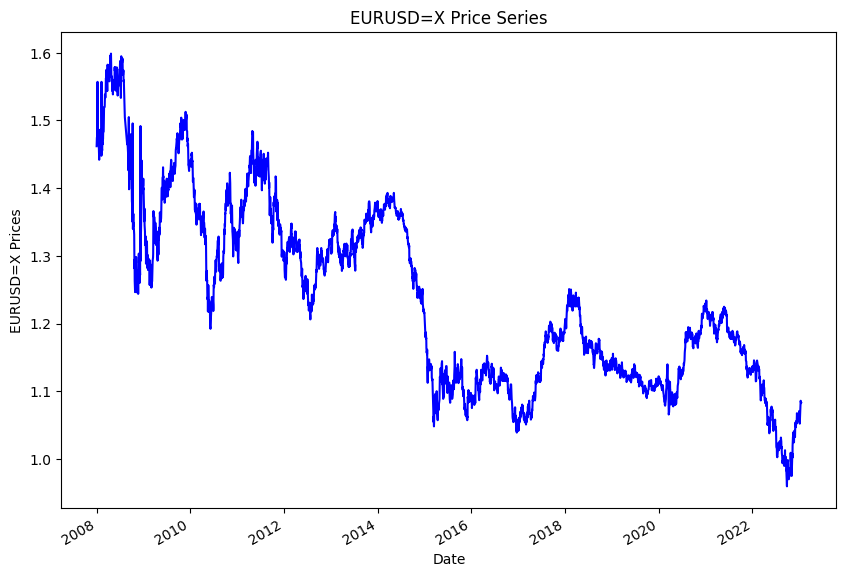

In [12]:
# Visualizing the closing price

data.Close.plot(figsize=(10,7),color='b')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

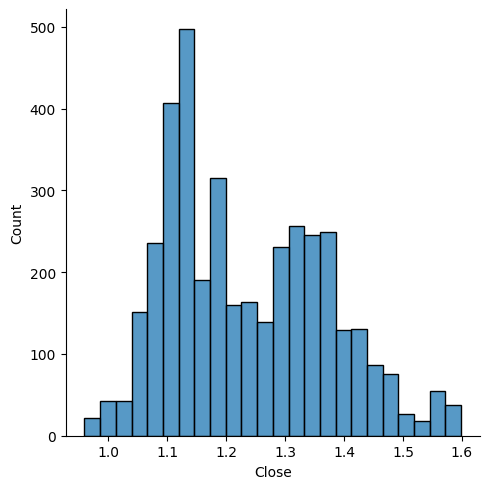

In [13]:
# Visualizing the distribution of the close price

sns.displot(data['Close'])

## Dataset development

In [14]:
# Separating the features and the target columns and spliting the data for training and testing

X = data.drop("Close", axis = 1)
y = data['Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3121, 4)
(781, 4)
(3121,)
(781,)


## Model building

In [16]:
# Using LinearRegression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1=lr.predict(X_test)


In [17]:
# Evaluating the model
# Finding the mean squared error (MSE), Root mean square error (RMSE), and R^2

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_sco = r2_score(y_test,y_pred)
    print('MSE:- ', mse)
    print('RMSE:- ', rmse)
    print("R2_score:- ", r2_sco)

calculate_metrics(y_test, pred1)

MSE:-  1.6786187434386783e-05
RMSE:-  0.004097094999433963
R2_score:-  0.9990560212816461


In [18]:
# Using Lasso and Ridge Regularization models

from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)



In [19]:
# For Lasso
calculate_metrics(y_test, la_p)

MSE:-  0.017789939523290083
RMSE:-  0.1333789320818325
R2_score:-  -0.00042516363115829847


In [20]:
# For Ridge
calculate_metrics(y_test, ri_p)

MSE:-  2.2416202355358927e-05
RMSE:-  0.004734575203263639
R2_score:-  0.9987394148878365


In [21]:
# Using SVM

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}
grid = GridSearchCV(svr, param_grid, refit = True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.928 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
grid.best_estimator_

SVR(C=1, gamma=1)

In [23]:
svr = SVR(C=1, gamma=1, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [24]:
calculate_metrics(y_test, svr_pred)

MSE:-  0.0007377745133013118
RMSE:-  0.027162004957316972
R2_score:-  0.9585109220171277


## Choosing the best model and saving them

In [25]:
# We choose Ridge regression

import joblib
joblib.dump(ri, 'model.pkl')
model = joblib.load('model.pkl')
